In [1]:
from collections import OrderedDict
from IPython.display import HTML, display
from matplotlib import pyplot as plt
from datetime import datetime

import folium
import io
# import simplejson
# import urllib
import numpy as np
import pandas as pd
import utm
# import webbrowser
% matplotlib inline

In [2]:
Σ = sum

In [3]:
def calc_euclidean(
    origin: tuple, destiny: tuple
) -> float:
    return np.sqrt(
        (destiny[0]-origin[0])**2 + 
        (destiny[1]-origin[1])**2
    )

In [4]:
def calc_rectangle(
    origin: tuple, destiny: tuple
) -> float:
    return (
        abs(destiny[0]-origin[0]) + 
        abs(destiny[1]-origin[1])
    )

In [5]:
def linear_regression(
    x: pd.DataFrame, y: pd.DataFrame
) -> dict:
    """
    ŷ = a + b*x
    
    where:
    b = Σ [ (xi - ̄x)(yi - ̄y) ] / Σ [ (xi - ̄x)²] 
    a = ̄y - b * ̄x 
    
    """
    x_bar = x.mean()
    y_bar = y.mean()
    n = x.shape[0]
    
    b = (
        Σ([(x[i] - x_bar)*(y[i] - y_bar) for i in range(n)]) / 
        Σ([(x[i] - x_bar)**2 for i in range(n)])
    )
    
    a = y_bar - b * x_bar
    
    return {'a': a, 'b': b}

In [6]:
def R2(x: pd.DataFrame, y: pd.DataFrame) -> float:
    """
    R² = {(1/N) * Σ[(xi-̄x) * (yi - ̄y)] / (σx * σy)}²
    
    where:
    σx = sqrt[Σ (xi - ̄x)² / N]
    σy = sqrt[Σ (yi - ̄y)² / N]
    
    """
    x_bar = x.mean()
    y_bar = y.mean()
    n = x.shape[0]
    
    σx = np.sqrt(Σ([(x[i] - x_bar)**2 / n for i in range(n)]))
    σy = np.sqrt(Σ([(y[i] - y_bar)**2 / n for i in range(n)]))
    
    return (
        (1/n) * 
        Σ([(x[i] - x_bar) * (y[i] - y_bar) for i in range(n)]) / 
        (σx * σy)
    )**2

In [7]:
places = [
    'Badajoz, Teatro López de Ayala',
    'Badajoz, Puente de la Universidad',
    'Badajoz, Centro comercial El Faro',
    'Badajoz, Palacio de Congresos Manuel Rojas',
    'Badajoz, Centro de Salud Valdepasillas',
    'Badajoz, Puerta del Pilar',
    'Badajoz, La Alcazaba',
    'Badajoz, Plaza Alta',
    'Badajoz, Puerta Palma',
    'Badajoz, Puente Real'
]

In [8]:
# Location data from googlemaps
positions_latlon = []
# 1 - Teatro López de Ayala
positions_latlon.append((38.8762837,-6.9745847))
# 2. Puente de la Universidad
positions_latlon.append((38.882257, -6.9861811))
# 3. Centro comercial “El Faro”
positions_latlon.append((38.884088, -7.0242667))
# 4. Palacio de Congresos “Manuel Rojas”,
positions_latlon.append((38.8758768,-6.9704163))
# 5. Fuente de Valdepasillas
positions_latlon.append((38.864476, -6.9780557))
# 6. Puerta del Pilar
positions_latlon.append((38.8750098, -6.9733397))
# 7. La Alcazaba
positions_latlon.append((38.8834097, -6.9707085))
# 8. Plaza Alta
positions_latlon.append((38.8813045, -6.9704468))
# 9. Puerta Palma
positions_latlon.append((38.8805376, -6.9777905))
# 10. Puente Real
positions_latlon.append((38.8781387, -6.9965576))

In [9]:
positions_decimal = [
    utm.from_latlon(*loc)[:2] for loc in positions_latlon
]
positions_decimal

[(675697.1206430902, 4304997.36541177),
 (674676.456215953, 4305638.036457435),
 (671368.2692546261, 4305769.014606624),
 (676059.7504023478, 4304960.241261738),
 (675425.0317394832, 4303680.228215446),
 (675808.2694125636, 4304858.381575373),
 (676015.8069009123, 4305795.706528927),
 (676043.7055033607, 4305562.568521262),
 (675408.5416969855, 4305463.310096603),
 (673786.3670745756, 4305161.157332059)]

In [10]:
map_osm = folium.Map(location=positions_latlon[1], zoom_start=14)

for i, p in enumerate(positions_latlon):
    folium.Marker(p, popup=places[i]).add_to(map_osm)
map_osm

### Distances Matrix

In [11]:
matrix_real_distance = pd.DataFrame({
    i: [0]*10 for i in range(10)
})

matrix_euclidean_distance = pd.DataFrame({
    i: [0]*10 for i in range(10)
})

matrix_rectangle_distance = pd.DataFrame({
    i: [0]*10 for i in range(10)
})

In [12]:
# matrix de distancias reais
data_real_csv = """
0;1800;6600;1100;2000;350;1600;1800;900;2600
1800;0;4300;2800;2900;1900;1800;3500;1200;2100
6600;4300;0;7300;5900;6000;5600;7300;5400;4500
1100;2800;7300;0;2300;450;2200;1800;1500;3100
2000;2900;5900;2300;0;2200;3400;4200;2800;2400
350;1900;6000;450;2200;0;1800;1900;1100;2600
1600;1800;5600;2200;3400;1800;0;2200;650;2800
1800;3500;7300;1800;4200;1900;2200;0;1000;3100
900;1200;5400;1500;2800;1100;650;1000;0;2200
2600;2100;4500;3100;2400;2600;2800;3100;2200;0
"""

matrix_real_distance = pd.read_csv(
    io.StringIO(data_real_csv), 
    index_col=False, header=None,
    sep=';'
)

# check values
_m = matrix_real_distance
_n = matrix_real_distance.shape[0]
for i in range(_n):
    for j in range(_n):
        assert _m.iloc[i, j] == _m.iloc[j, i]

In [13]:
for i1, loc1 in enumerate(positions_decimal):
    for i2, loc2 in enumerate(positions_decimal):
        # euclidean distance
        matrix_euclidean_distance.iloc[i1, i2] = (
            calc_euclidean(loc1, loc2)
        )
        
        # rectangle distance
        matrix_rectangle_distance.iloc[i1, i2] = (
            calc_rectangle(loc1, loc2)
        )
    # input()

In [14]:
print('REAL DISTANCE')
display(matrix_real_distance)

print('EUCLIDEAN DISTANCE')
display(matrix_euclidean_distance)

print('RECTANGLE DISTANCE')
display(matrix_rectangle_distance)

REAL DISTANCE


,0,1,2,3,4,5,6,7,8,9
0,0,1800,6600,1100,2000,350,1600,1800,900,2600
1,1800,0,4300,2800,2900,1900,1800,3500,1200,2100
2,6600,4300,0,7300,5900,6000,5600,7300,5400,4500
3,1100,2800,7300,0,2300,450,2200,1800,1500,3100
4,2000,2900,5900,2300,0,2200,3400,4200,2800,2400
5,350,1900,6000,450,2200,0,1800,1900,1100,2600
6,1600,1800,5600,2200,3400,1800,0,2200,650,2800
7,1800,3500,7300,1800,4200,1900,2200,0,1000,3100
8,900,1200,5400,1500,2800,1100,650,1000,0,2200
9,2600,2100,4500,3100,2400,2600,2800,3100,2200,0


EUCLIDEAN DISTANCE


,0,1,2,3,4,5,6,7,8,9
0,0.000000,1205.078944,4397.089586,364.525095,1344.947124,177.962231,859.598435,663.004993,548.071398,1917.760932
1,1205.078944,0.000000,3310.778798,1540.424985,2096.038747,1374.359068,1348.599314,1369.330502,752.647629,1009.788285
2,4397.089586,3310.778798,0.000000,4760.683741,4562.932220,4532.422522,4647.614295,4679.991891,4051.821400,2493.328605
3,364.525095,1540.424985,4760.683741,0.000000,1428.741117,271.326526,836.620131,602.540925,822.891871,2282.244295
4,1344.947124,2096.038747,4562.932220,1428.741117,0.000000,1238.917452,2196.420676,1981.404111,1783.158130,2208.703903
5,177.962231,1374.359068,4532.422522,271.326526,1238.917452,0.000000,960.025978,742.502126,725.066040,2044.446679
6,859.598435,1348.599314,4647.614295,836.620131,2196.420676,960.025978,0.000000,234.801326,692.284924,2317.985035
7,663.004993,1369.330502,4679.991891,602.540925,1981.404111,742.502126,234.801326,0.000000,642.872690,2292.751126
8,548.071398,752.647629,4051.821400,822.891871,1783.158130,725.066040,692.284924,642.872690,0.000000,1650.074786
9,1917.760932,1009.788285,2493.328605,2282.244295,2208.703903,2044.446679,2317.985035,2292.751126,1650.074786,0.000000


RECTANGLE DISTANCE


,0,1,2,3,4,5,6,7,8,9
0,0.000000,1661.335473,5100.500583,399.753909,1589.226100,250.132606,1117.027375,911.787970,754.523631,2074.545489
1,1661.335473,0.000000,3439.165111,2061.089382,2706.383766,1911.468079,1497.020756,1442.717224,906.811842,1366.968267
2,5100.500583,3439.165111,0.000000,5500.254493,6145.548876,5350.633189,4674.229569,4881.882334,4345.976952,3025.955095
3,399.753909,2061.089382,5500.254493,0.000000,1914.731709,353.340676,879.408769,618.372159,1154.277540,2474.299398
4,1589.226100,2706.383766,6145.548876,1914.731709,0.000000,1561.391033,2706.253475,2501.014070,1799.571924,3119.593782
5,250.132606,1911.468079,5350.633189,353.340676,1561.391033,0.000000,1144.862442,939.623037,1004.656237,2324.678095
6,1117.027375,1497.020756,4674.229569,879.408769,2706.253475,1144.862442,0.000000,261.036610,939.661636,2863.989023
7,911.787970,1442.717224,4881.882334,618.372159,2501.014070,939.623037,261.036610,0.000000,734.422231,2658.749618
8,754.523631,906.811842,4345.976952,1154.277540,1799.571924,1004.656237,939.661636,734.422231,0.000000,1924.327387
9,2074.545489,1366.968267,3025.955095,2474.299398,3119.593782,2324.678095,2863.989023,2658.749618,1924.327387,0.000000


In [15]:
n = matrix_real_distance.shape[0]

In [16]:
# REAL
series_real_distance = pd.Series(OrderedDict(
    ('%s_%s' % (i, j), 
     matrix_real_distance.iloc[i, j])
    for i in range(n) 
    for j in range(i+1, n)
))

print('Primeiras 5 linhas ...')
series_real_distance.head()

Primeiras 5 linhas ...


0_1    1800
0_2    6600
0_3    1100
0_4    2000
0_5     350
dtype: int64

## Statistic Analysis

### Euclidean

In [17]:
# EUCLIDEAN
euclidean_analysis = pd.DataFrame(OrderedDict(
    ('%s_%s' % (i, j), 
     [matrix_euclidean_distance.iloc[i, j]])
    for i in range(n) 
    for j in range(i+1, n)
), index=['X']).T

euclidean_analysis['Y'] = series_real_distance

print('EUCLIDEAN - Primeiras 5 linhas ...')
display(euclidean_analysis.head())

EUCLIDEAN - Primeiras 5 linhas ...


,X,Y
0_1,1205.078944,1800
0_2,4397.089586,6600
0_3,364.525095,1100
0_4,1344.947124,2000
0_5,177.962231,350


In [18]:
param_euclidean = linear_regression(
    euclidean_analysis['X'], euclidean_analysis['Y']
)

print(
    'Linear Regression:\n a: %s, b: %s' % 
    (param_euclidean['a'], param_euclidean['b'])
)

Linear Regression:
 a: 535.786240706, b: 1.25468365035


In [19]:
# R²
param_euclidean['r2'] = R2(
    euclidean_analysis['X'], euclidean_analysis['Y']
)

print(
    'Euclidean R²: %s' % param_euclidean['r2']
)

Euclidean R²: 0.906474846898


### Retangle

In [20]:
# RETANGLE
retangle_analysis = pd.DataFrame(OrderedDict(
    ('%s_%s' % (i, j), 
     [matrix_rectangle_distance.iloc[i, j]])
    for i in range(n) 
    for j in range(i+1, n)
), index=['X']).T

retangle_analysis['Y'] = series_real_distance

print('RETANGLE - Primeiras 5 linhas ...')
display(retangle_analysis.head())

RETANGLE - Primeiras 5 linhas ...


,X,Y
0_1,1661.335473,1800
0_2,5100.500583,6600
0_3,399.753909,1100
0_4,1589.226100,2000
0_5,250.132606,350


In [21]:
param_retangle = linear_regression(
    retangle_analysis['X'], retangle_analysis['Y']
)

print(
    'Retangle Linear Regression:\n a: %s, b: %s' % 
    (param_retangle['a'], param_retangle['b'])
)

Retangle Linear Regression:
 a: 476.49608451, b: 1.08778427121


In [22]:
param_retangle['r2'] = R2(
    retangle_analysis['X'], retangle_analysis['Y']
)

print(
    'Retangle R²: %s' % param_retangle['r2']
)

Retangle R²: 0.871381401601


## Predict Adjust (Linear Regression)

In [23]:
f_euclidean = lambda x: (
    param_euclidean['a'] + param_euclidean['b'] * x
)

f_retangle = lambda x: (
    param_retangle['a'] + param_retangle['b'] * x
)

### Euclidean

In [24]:
euclidean_analysis['Y_Adjusted'] = (
    f_euclidean(euclidean_analysis['X'])
)

euclidean_analysis['Diff(%)'] = (
    (1-euclidean_analysis['Y_Adjusted'] /
     euclidean_analysis['Y'])*100
)

print('Quadro final da análise de distância euclideana')
display(euclidean_analysis)

Quadro final da análise de distância euclideana


,X,Y,Y_Adjusted,Diff(%)
0_1,1205.078944,1800,2047.779089,-13.765505
0_2,4397.089586,6600,6052.742653,8.291778
0_3,364.525095,1100,993.149917,9.713644
0_4,1344.947124,2000,2223.269407,-11.163470
0_5,177.962231,350,759.072543,-116.877869
0_6,859.598435,1600,1614.310344,-0.894396
0_7,663.004993,1800,1367.647765,24.019569
0_8,548.071398,900,1223.442463,-35.938051
0_9,1917.760932,2600,2941.969528,-13.152674
1_2,3310.778798,4300,4689.766268,-9.064332


### Retangle

In [25]:
retangle_analysis['Y_Adjusted'] = (
    f_retangle(retangle_analysis['X'])
)

retangle_analysis['Diff(%)'] = (
    (1-retangle_analysis['Y_Adjusted'] /
     retangle_analysis['Y'])*100
)

print('Quadro final da análise de distância retangular')
display(retangle_analysis)

Quadro final da análise de distância retangular


,X,Y,Y_Adjusted,Diff(%)
0_1,1661.335473,1800,2283.670681,-26.870593
0_2,5100.500583,6600,6024.740394,8.716055
0_3,399.753909,1100,911.342099,17.150718
0_4,1589.226100,2000,2205.231239,-10.261562
0_5,250.132606,350,748.586399,-113.881828
0_6,1117.027375,1600,1691.580894,-5.723806
0_7,911.787970,1800,1468.324697,18.426406
0_8,754.523631,900,1297.255023,-44.139447
0_9,2074.545489,2600,2733.154037,-5.121309
1_2,3439.165111,4300,4217.565798,1.917074


## Graphic Representation

In [26]:
_line = np.linspace(0, euclidean_analysis['Y'].max(), 1000)

### Euclidean

Euclidean


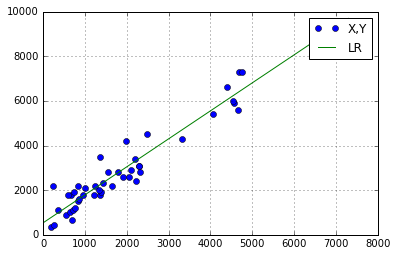

In [27]:
_data = euclidean_analysis.sort_values(by='Y')

print('Euclidean')
plt.plot(
    _data['X'], 
    _data['Y'], 'o',
    label='X,Y'
)
plt.plot(_line, f_euclidean(_line), label='LR')

plt.legend()
plt.grid()
plt.show()

### Retangle

Retangle


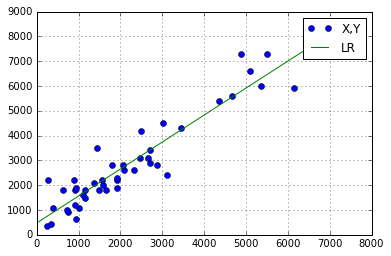

In [28]:
_data = retangle_analysis.sort_values(by='Y')

print('Retangle')
plt.plot(
    _data['X'], 
    _data['Y'], 'o',
    label='X,Y'
)
plt.plot(_line, f_retangle(_line), label='LR')

plt.legend()
plt.grid()
plt.show()